In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler

import os


import warnings
warnings.filterwarnings('ignore')


In [2]:
pd.options.display.max_rows = 200

In [3]:
house=pd.read_csv('train.csv')

In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Skewness check

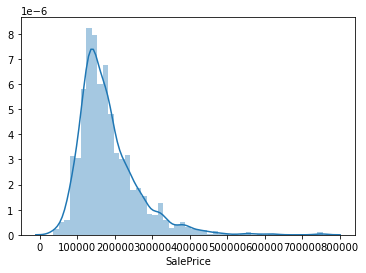

In [6]:
sns.distplot(house.SalePrice)

In [7]:
house.SalePrice.skew()

1.8828757597682129

In [8]:
house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

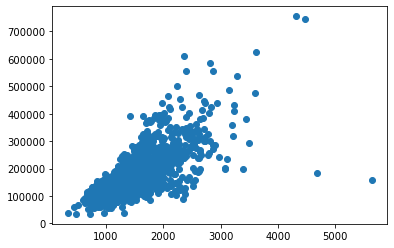

In [9]:
# Plotting GrLivArea and SalePrice
plt.scatter(x=house.GrLivArea,y=house.SalePrice)

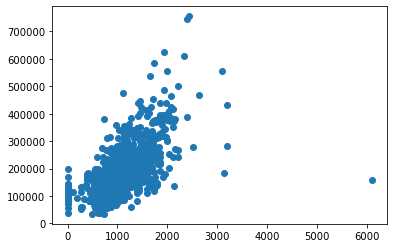

In [10]:
# Plotting TotalBsmtSF and SalePrice
plt.scatter(x=house.TotalBsmtSF,y=house.SalePrice)

#### We can see from above plots as Total square feet of basement area and Above grade (ground) living area square feet increasing saleprice also increasing

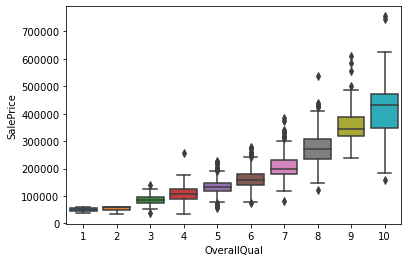

In [11]:
sns.boxplot(x=house.OverallQual,y=house.SalePrice)

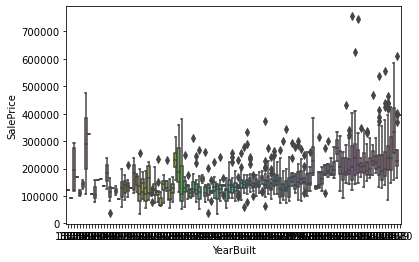

In [12]:
sns.boxplot(x=house.YearBuilt,y=house.SalePrice)

#### We can see there are outliers present

In [13]:
house.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
90%,1314.100000,120.000000,96.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,...,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,278000.000000
95%,1387.050000,160.000000,107.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,...,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,326100.000000
99%,1445.410000,190.000000,141.000000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.920000,1572.410000,...,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,2010.000000,442567.010000


In [14]:
# Handling Outliers
col = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','1stFlrSF','GrLivArea','OpenPorchSF',
           'EnclosedPorch','3SsnPorch',
           'ScreenPorch' ,'PoolArea','MiscVal','SalePrice']
def drop_outliers(x):
    list = []
    for i in col:
        Q1 = x[i].quantile(.25)
        Q3 = x[i].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[i] >= (Q1-(1.5*IQR))) & (x[i] <= (Q3+(1.5*IQR)))] 
    return x   

house = drop_outliers(house)

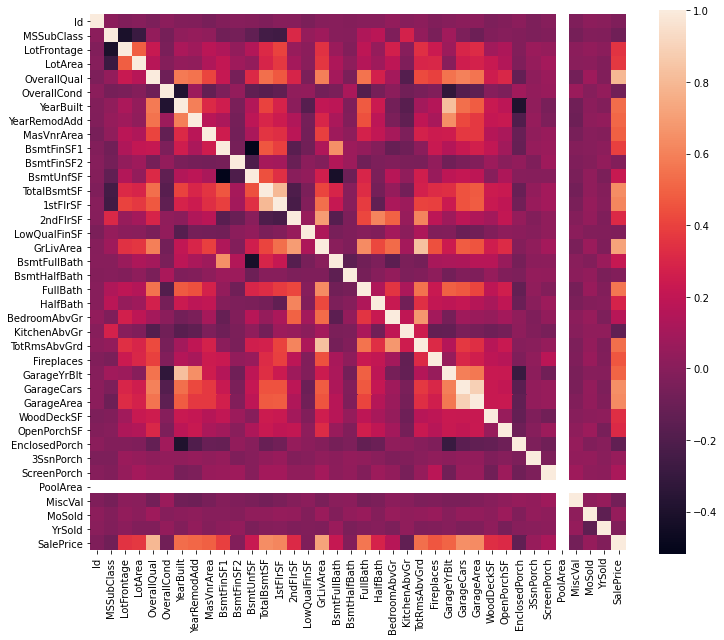

In [15]:
# Heatmap for checking correlation
cormat=house.corr()
f,ax=plt.subplots(figsize=(12,10))
sns.heatmap(cormat,square=True)


#### We can see their are some features whose correlation values are high. Which we can handle during feature selection during modeling

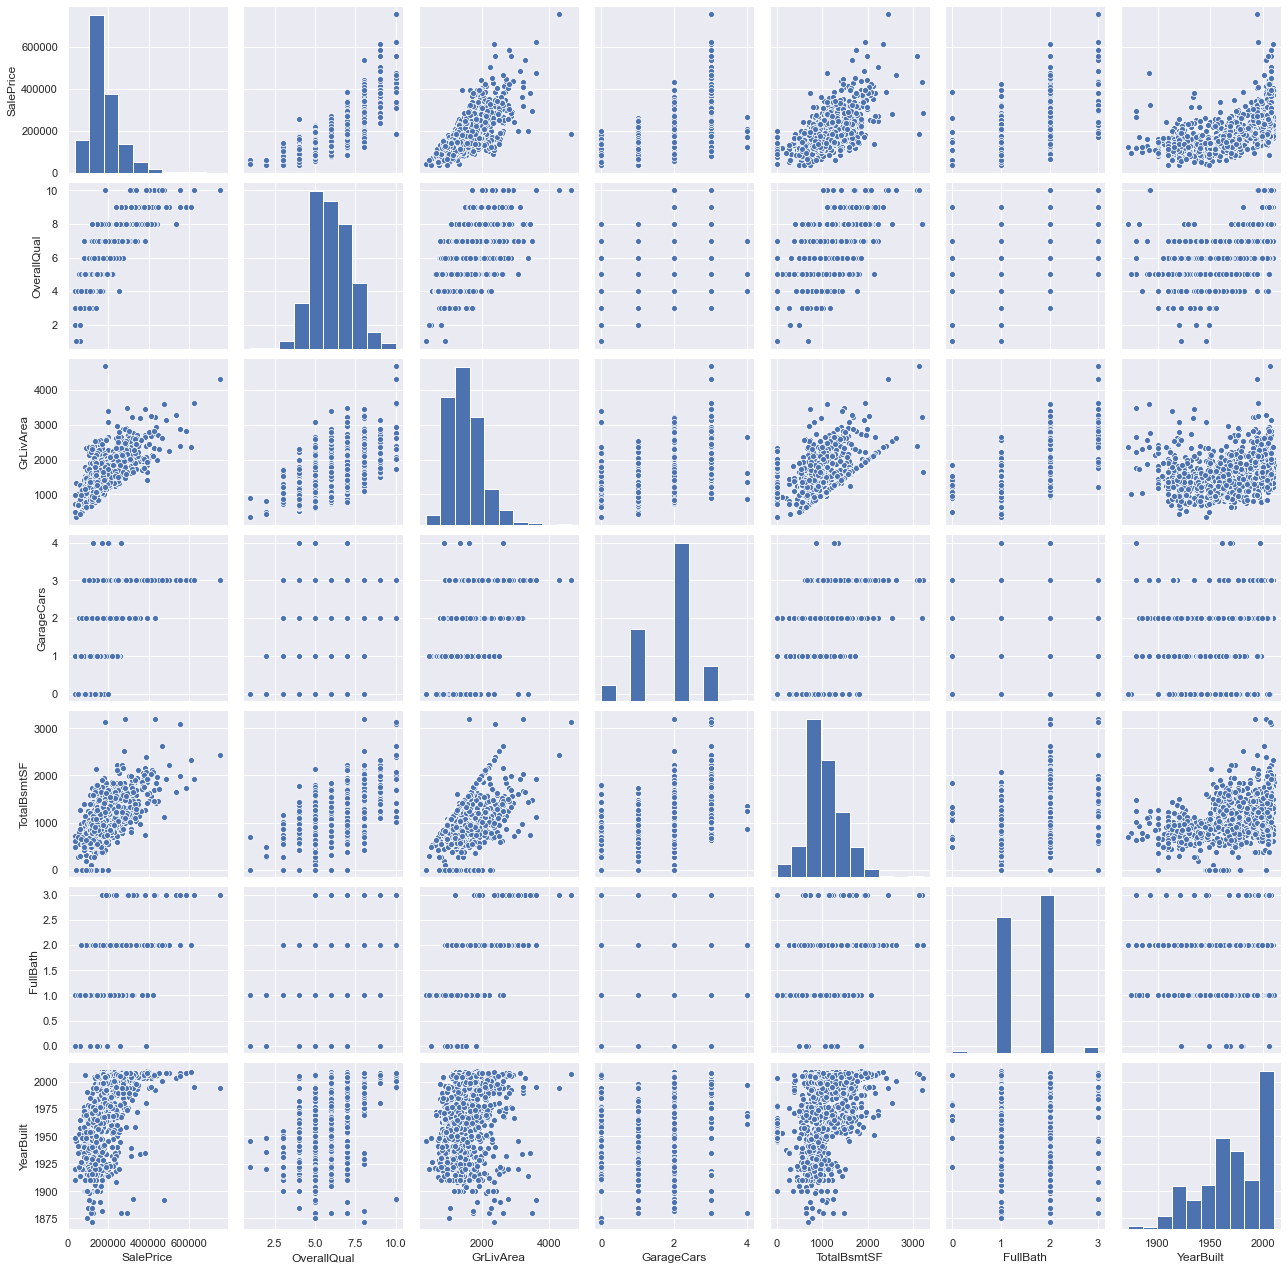

In [16]:
sns.set()
cols=['SalePrice','OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','YearBuilt']
sns.pairplot(house[cols],size=2.5)
plt.show()

In [17]:
# Handling columns related to year and dropping columns which are not essential in model building
house['Age_of_house'] = 2021-house.YearBuilt
house = house.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis='columns')

In [18]:
house.Age_of_house.head(10)

0     18
1     45
2     20
3    106
4     21
5     28
6     17
7     48
8     90
9     82
Name: Age_of_house, dtype: int64

In [19]:
# checking for null percentage
total=house.isnull().sum().sort_values(ascending=False)
percent=(house.isnull().sum())/(house.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data

,Total,Percent
PoolQC,1433,1.000000
MiscFeature,1389,0.969295
Alley,1343,0.937195
Fence,1161,0.810188
FireplaceQu,683,0.476622
LotFrontage,250,0.174459
GarageType,80,0.055827
GarageQual,80,0.055827
GarageCond,80,0.055827
GarageFinish,80,0.055827


In [20]:
notavailable=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage','GarageCond','GarageType','GarageFinish','GarageQual','BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual']

In [21]:
# changing NA to none as these values are not null and they have meanings.
for i in notavailable:
    house[i].fillna("None",inplace=True)


In [22]:
house['MasVnrArea'].fillna(house['MasVnrArea'].median(),inplace=True)

In [23]:
house.Electrical.value_counts()

SBrkr    1307
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [24]:
house.MasVnrType.value_counts()

None       852
BrkFace    442
Stone      126
BrkCmn      13
Name: MasVnrType, dtype: int64

In [25]:
house.Electrical.fillna('None',inplace= True)
house.MasVnrType.fillna('None',inplace= True)

In [26]:
total=house.isnull().sum().sort_values(ascending=False)
percent=(house.isnull().sum())/(house.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data

,Total,Percent
Age_of_house,0,0.0
BsmtQual,0,0.0
Exterior1st,0,0.0
Exterior2nd,0,0.0
MasVnrType,0,0.0
MasVnrArea,0,0.0
ExterQual,0,0.0
ExterCond,0,0.0
Foundation,0,0.0
BsmtCond,0,0.0


#### Data is clean

In [27]:
datatypes=house.dtypes

In [28]:
num_types=datatypes[(datatypes=='int64') | (datatypes == 'float64')]

In [29]:
cat_types=datatypes[(datatypes=='object')]

In [30]:
num_cols=list(num_types.index)
cat_cols=list(cat_types.index)

### Data Preparation

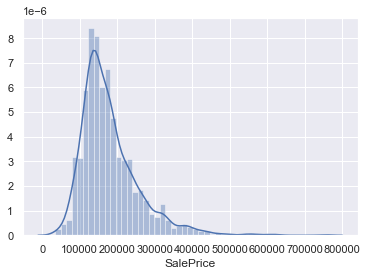

In [31]:
sns.distplot(house.SalePrice)

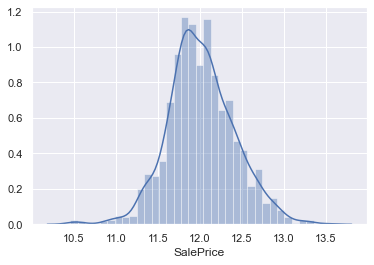

In [32]:
sns.distplot(np.log(house.SalePrice))

In [33]:
# handling skewness
house['TransformedPrice']=np.log(house.SalePrice)

In [34]:
# handling categorical columns

for i in cat_cols:
    feature_set= set(house[i])
    for j in feature_set:
        feature_list = list(feature_set)
        house.loc[house[i]==j,i]=feature_list.index(j)

In [35]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,Age_of_house,TransformedPrice
0,1,60,1,36,8450,1,0,1,2,0,...,0,2,0,0,2,1,2,208500,18,12.247694
1,2,20,1,51,9600,1,0,1,2,0,...,0,2,0,0,5,1,2,181500,45,12.109011
2,3,60,1,39,11250,1,0,3,2,0,...,0,2,0,0,9,1,2,223500,20,12.317167
3,4,70,1,31,9550,1,0,3,2,0,...,0,2,0,0,2,1,0,140000,106,11.849398
4,5,60,1,55,14260,1,0,3,2,0,...,0,2,0,0,12,1,2,250000,21,12.429216


In [36]:
# Scalling dataset
scaler = StandardScaler()
# fit scaler on data
scaled_house=scaler.fit_transform(house)
scaled_house = pd.DataFrame(scaled_house, columns = house.columns)
scaled_house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,Age_of_house,TransformedPrice
0,-1.727511,0.074144,-0.486104,-0.076918,-0.287322,0.059173,-0.245834,-0.726755,0.159026,-0.026426,...,0.0,-0.282011,-0.176064,-0.156573,-1.599720,-0.144586,-0.133467,0.368699,-1.051656,0.576358
1,-1.725138,-0.873446,-0.486104,0.609975,-0.075954,0.059173,-0.245834,-0.726755,0.159026,-0.026426,...,0.0,-0.282011,-0.176064,-0.156573,-0.490674,-0.144586,-0.133467,0.021869,-0.159594,0.226698
2,-1.722766,0.074144,-0.486104,0.060461,0.227314,0.059173,-0.245834,1.392146,0.159026,-0.026426,...,0.0,-0.282011,-0.176064,-0.156573,0.988055,-0.144586,-0.133467,0.561382,-0.985577,0.751518
3,-1.720393,0.311042,-0.486104,-0.305882,-0.085143,0.059173,-0.245834,1.392146,0.159026,-0.026426,...,0.0,-0.282011,-0.176064,-0.156573,-1.599720,-0.144586,-2.055656,-0.511221,1.855805,-0.427862
4,-1.718020,0.074144,-0.486104,0.793146,0.780546,0.059173,-0.245834,1.392146,0.159026,-0.026426,...,0.0,-0.282011,-0.176064,-0.156573,2.097101,-0.144586,-0.133467,0.901789,-0.952538,1.034027


## Model Building

In [37]:
X=scaled_house.drop(['Id','SalePrice','TransformedPrice'],axis=1).values
y=scaled_house['TransformedPrice'].values

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [39]:
# list of alphas
params= {
    'alpha':[0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,20.0,50.0,100.0,500.0,1000.0]
}

In [40]:
# Lasso

lasso= Lasso()
folds =5
model_cv = GridSearchCV(estimator=lasso,param_grid=params,scoring='neg_mean_absolute_error',cv=folds,return_train_score=True,verbose=1)
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.1s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0,
                                   50.0, 100.0, 500.0, 1000.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [41]:
cv_results=pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.069813,1.537400e-02,0.000599,0.000489,0.0001,{'alpha': 0.0001},-0.220790,-0.200505,-0.209432,-0.227017,...,-0.215845,0.009565,3,-0.192636,-0.196672,-0.194192,-0.190441,-0.188568,-0.192502,0.002828
1,0.047674,7.953320e-03,0.000998,0.000001,0.001,{'alpha': 0.001},-0.218851,-0.200605,-0.209240,-0.225768,...,-0.214709,0.008803,2,-0.192842,-0.196661,-0.194204,-0.190733,-0.188523,-0.192593,0.002801
2,0.006183,3.986133e-04,0.000400,0.000490,0.01,{'alpha': 0.01},-0.216407,-0.198987,-0.215753,-0.220073,...,-0.213859,0.007585,1,-0.199298,-0.202224,-0.200288,-0.196545,-0.195391,-0.198749,0.002485
3,0.002991,4.862804e-07,0.000399,0.000489,0.05,{'alpha': 0.05},-0.246592,-0.211888,-0.250810,-0.233783,...,-0.234702,0.013714,4,-0.228127,-0.229428,-0.228529,-0.225601,-0.223787,-0.227094,0.002085
4,0.002593,4.885388e-04,0.000798,0.000399,0.1,{'alpha': 0.1},-0.300813,-0.254420,-0.294856,-0.261622,...,-0.276620,0.018237,5,-0.269174,-0.275077,-0.272165,-0.270155,-0.271478,-0.271610,0.002020


In [42]:
# best alpha for lasso regression
print(model_cv.best_params_)

{'alpha': 0.01}


In [43]:
# fitting model to best alpha
alpha= 0.01
lasso=Lasso(alpha=alpha)
lasso.fit(X_train,y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9159889441204306
0.8667277162666228


In [44]:
# Getting top 10 features according to lasso coefficent
lasso_coef = pd.DataFrame(index=scaled_house.drop(['Id','SalePrice','TransformedPrice'],axis=1).columns)
lasso_coef.rows = scaled_house.drop(['Id','SalePrice','TransformedPrice'],axis=1).columns
lasso_coef['Lasso_Coefficent'] = lasso.coef_
lasso_coef.sort_values(by='Lasso_Coefficent',ascending=False).head(10)

,Lasso_Coefficent
GrLivArea,0.325708
OverallQual,0.238323
OverallCond,0.130638
TotalBsmtSF,0.093192
BsmtFinSF1,0.074522
LotArea,0.074266
SaleCondition,0.061864
GarageCars,0.061627
Foundation,0.056722
BsmtFullBath,0.044399


In [45]:
# Ridge

ridge= Ridge()
folds =5
model_cv = GridSearchCV(estimator=ridge,param_grid=params,scoring='neg_mean_absolute_error',cv=folds,return_train_score=True,verbose=1)
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.5s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20.0,
                                   50.0, 100.0, 500.0, 1000.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [46]:
cv_results=pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003391,0.000796,0.000798,3.988268e-04,0.0001,{'alpha': 0.0001},-0.221044,-0.200535,-0.209455,-0.227140,...,-0.215982,0.009638,26,-0.192643,-0.196678,-0.194211,-0.190425,-0.188607,-0.192513,0.002824
1,0.002195,0.000747,0.000997,6.311300e-04,0.001,{'alpha': 0.001},-0.221044,-0.200535,-0.209455,-0.227139,...,-0.215982,0.009638,25,-0.192643,-0.196678,-0.194211,-0.190425,-0.188607,-0.192513,0.002824
2,0.001795,0.000399,0.000599,7.981181e-04,0.01,{'alpha': 0.01},-0.221041,-0.200534,-0.209454,-0.227139,...,-0.215981,0.009637,24,-0.192643,-0.196678,-0.194211,-0.190424,-0.188607,-0.192513,0.002824
3,0.002594,0.000489,0.000798,3.987799e-04,0.05,{'alpha': 0.05},-0.221031,-0.200532,-0.209451,-0.227136,...,-0.215977,0.009636,23,-0.192645,-0.196677,-0.194210,-0.190423,-0.188607,-0.192512,0.002824
4,0.002394,0.001017,0.000997,3.504023e-07,0.1,{'alpha': 0.1},-0.221018,-0.200530,-0.209448,-0.227132,...,-0.215972,0.009635,22,-0.192646,-0.196676,-0.194209,-0.190422,-0.188607,-0.192512,0.002823


In [47]:
# Best alpha according to ridge regression
print(model_cv.best_params_)

{'alpha': 50.0}


In [48]:
alpha= 50.0
ridge=Ridge(alpha=alpha)
ridge.fit(X_train,y_train)
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9196962009654799
0.8617337157745436


In [49]:
# Getting top 10 features according to ridge coefficent
ridge_coef = pd.DataFrame(index=scaled_house.drop(['Id','SalePrice','TransformedPrice'],axis=1).columns)
ridge_coef.rows = scaled_house.drop(['Id','SalePrice','TransformedPrice'],axis=1).columns
ridge_coef['Ridge_Coefficent'] = ridge.coef_
ridge_coef.sort_values(by='Ridge_Coefficent',ascending=False).head(10)

,Ridge_Coefficent
OverallQual,0.197347
GrLivArea,0.158313
OverallCond,0.133524
1stFlrSF,0.106232
2ndFlrSF,0.094897
TotalBsmtSF,0.083609
LotArea,0.077496
BsmtFinSF1,0.072560
Foundation,0.062687
SaleCondition,0.060116


### Best alpha for Lasso : 0.01

### Best alpha for Ridge : 50.0

### Choosing Lasso regression as we can see both methods have almost equal r-square score. Also Lasso helps in feature selection.

#### Top 5 features for predicting model 
1. GrLivArea   : Above grade (ground) living area square feet
2. OverallQual : Rates the overall material and finish of the house
3. OverallCond : Rates the overall condition of the house
4. TotalBsmtSF : Total square feet of basement area
5. GarageCars  : Size of garage in car capacity